In [1]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARMKASTR/py/')
from median import median
from create_mask import create_mask
from normalize_flat import normalize_flat
from bias_subtract import bias_subtract
from variance_image import variance_image

In [2]:
run floader.py

In [3]:
b = median(BIAS)

In [4]:
f = median(FLAT)

In [5]:
m = create_mask(f,b)

In [6]:
hdu = fits.PrimaryHDU(m)
hdul = fits.HDUList([hdu])
hdul.writeto('/home/ryan/projects/CHARMKASTR/test_fits/MedianMask.fits')

In [6]:
nf = normalize_flat(f,m)

In [7]:
hdu = fits.PrimaryHDU(nf)
hdul = fits.HDUList([hdu])
hdul.writeto('/home/ryan/projects/CHARMKASTR/test_fits/MedianNormFlat.fits')

OSError: File '/home/ryan/projects/CHARMKASTR/test_fits/MedianNormFlat.fits' already exists.

In [8]:
subtr = bias_subtract(f, b)

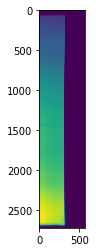

In [9]:
plt.imshow(subtr)

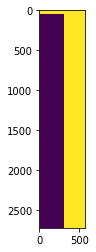

In [10]:
plt.imshow(m)

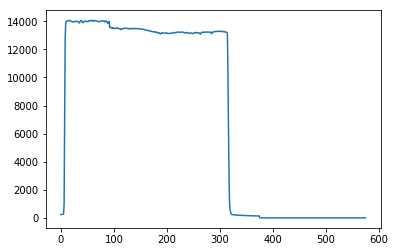

In [11]:
plt.plot(np.median(subtr, axis=0))

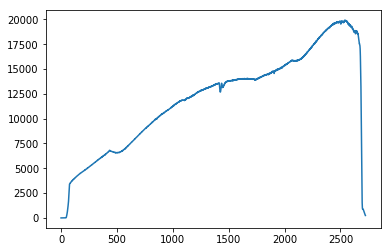

In [12]:
plt.plot(np.median(subtr, axis=1))

In [13]:
#where to cut off for the vertical plot ^
#which read speed are we using for creating the variance image?

In [13]:
ghdul = fits.open('/home/ryan/projects/CHARMKASTR/raw/data-2017-08-12-shane-Adam.Burgasser/red/test1035/science/r1033.fits')

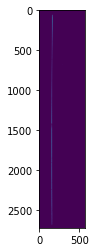

In [14]:
plt.imshow(ghdul[0].data)

In [24]:
ghdul[0].header

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                  575 / NUMBER OF COLUMNS                              
NAXIS2  =                 2725 / NUMBER OF ROWS                                 
CRVAL1U =                  420 / COLUMN ORIGIN                                  
CRVAL2U =                 3400 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                 1033 / OBSERVATION NUMBER                             
IDNUM   =                    2 / IMAGE ID                                       
UGEOM   =                    4 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

In [25]:
g_star = ghdul[0].data

In [26]:
g_subtr = bias_subtract(g_star, b)

In [27]:
g_var = variance_image(g_subtr)

In [19]:
hdu = fits.PrimaryHDU(g_var)
hdul = fits.HDUList([hdu])
hdul.writeto('/home/ryan/projects/CHARMKASTR/test_fits/r1033Variance.fits')

OSError: File '/home/ryan/projects/CHARMKASTR/test_fits/r1033Variance.fits' already exists.

In [34]:
#order of magnitude expected for the G star variance?

In [28]:
g_norm = g_subtr / nf

In [29]:
hdu = fits.PrimaryHDU(g_norm)
hdul = fits.HDUList([hdu])
hdul.writeto('/home/ryan/projects/CHARMKASTR/test_fits/r1033Normalized.fits')

OSError: File '/home/ryan/projects/CHARMKASTR/test_fits/r1033Normalized.fits' already exists.

In [41]:
#again, order of magnitude expected?

In [30]:
g_median = np.median(g_norm)

In [31]:
g_masked = copy.deepcopy(g_norm)

for i in range (g_masked.shape[0]):
    for j in range(g_masked.shape[1]):
        if m[i][j] == 1:
            g_masked[i][j] = g_median
            

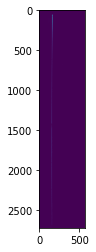

In [32]:
plt.imshow(g_masked)

In [33]:
hdu = fits.PrimaryHDU(g_masked)
hdul = fits.HDUList([hdu])
hdul.writeto('/home/ryan/projects/CHARMKASTR/test_fits/r1033Masked1.fits')

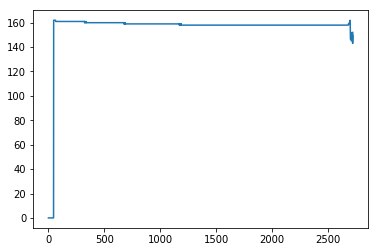

In [43]:
plt.plot(xpeak)

In [61]:
xpk = np.argmax(g_masked, axis=1)

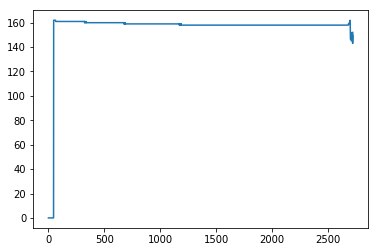

In [62]:
plt.plot(xpk)